# Volume 1: Facial Recognition
    Zeke Wander
    Mth420
    5/30/25

In [1]:
import os
import numpy as np
from imageio.v3 import imread
from scipy import linalg as la
from matplotlib import pyplot as plt

## Helper Functions

In [2]:
def get_faces(path="./faces94"):
    """Traverse the specified directory to obtain one image per subdirectory. 
    Flatten and convert each image to grayscale.
    
    Parameters:
        path (str): The directory containing the dataset of images.  
    
    Returns:
        ((mn,k) ndarray) An array containing one column vector per
            subdirectory. k is the number of people, and each original
            image is mxn.
    """
    # Traverse the directory and get one image per subdirectory.
    faces = []
    for (dirpath, dirnames, filenames) in os.walk(path):
        for fname in filenames:
            if fname[-3:] == "jpg":       # Only get jpg images.
                # Load the image, convert it to grayscale,
                # and flatten it into a vector.
                faces.append(np.ravel(imread(dirpath+"/"+fname, mode='F')))
                break
    # Put all the face vectors column-wise into a matrix.
    return np.transpose(faces)


def sample_faces(k, path="./faces94"):
    """Generate k sample images from the given path.

    Parameters:
        n (int): The number of sample images to obtain. 
        path(str): The directory containing the dataset of images.  
    
    Yields:
        ((mn,) ndarray): An flattend mn-array representing a single
        image. k images are yielded in total.
    """
    files = []
    for (dirpath, dirnames, filenames) in os.walk(path):
        for fname in filenames:
            if fname[-3:] == "jpg":       # Only get jpg images.
                files.append(dirpath+"/"+fname)

    # Get a subset of the image names and yield the images one at a time.
    test_files = np.random.choice(files, k, replace=False)
    for fname in test_files:
        yield np.ravel(imread(fname, mode='F'))

## Problem 1 

- Implement `show()`.
- Use `show()` to display a face from the `faces94` dataset.

In [3]:
def show(image, m=200, n=180):
    """Plot the flattened grayscale 'image' of width 'w' and height 'h'.
    
    Parameters:
        image ((mn,) ndarray): A flattened image.
        m (int): The original number of rows in the image.
        n (int): The original number of columns in the image.
    """
    plt.imshow(image.reshape((m, n)))

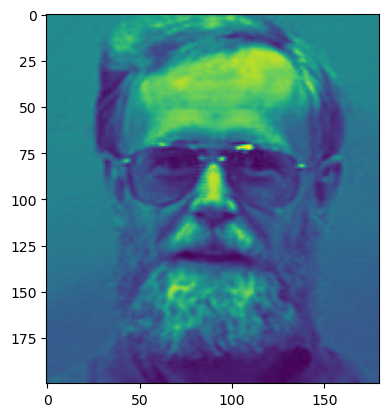

In [4]:
#get the faces
F = get_faces()

#show the first face
show(F[:,1])

del F

In [5]:
class FacialRec(object):
    """Class for storing a database of face images, with methods for
    matching other faces to the database.
    
    Attributes:
        F ((mn,k) ndarray): The flatten images of the dataset, where
            k is the number of people, and each original image is mxn.
        mu ((mn,) ndarray): The mean of all flatten images.
        Fbar ((mn,k) ndarray): The images shifted by the mean.
        U ((mn,k) ndarray): The U in the compact SVD of Fbar;
            the columns are the eigenfaces.
    """
    # Problems 2-3
    def __init__(self, path='./faces94'):
        """Initialize the F, mu, Fbar, and U attributes.
        This is the main part of the computation.
        """
        
        self.s = -1
        self.F = get_faces(path)
        
        #calculate the average face
        self.mu = np.mean(self.F, axis=1).reshape((-1, 1))
        
        #and the shifted faces
        self.Fbar = self.F - self.mu
        
        self.U = np.linalg.svd(self.Fbar, full_matrices=False)[0]

    # Problem 3
    def project(self, A, s):
        """Project a face vector onto the subspace spanned by the first s
        eigenfaces, and represent that projection in terms of those eigenfaces.
        
        Parameters:
            A((mn,) or (mn,l) ndarray): The array to be projected. 
            s(int): the number of eigenfaces.
        Returns: 
            ((s,) ndarray): An array of the projected image of s eigenfaces.
        """
        Us = self.U[:,0:s]
        
        return (Us.T @ A)

    # Problem 5
    def find_nearest(self, g, s=38):
        """Find the index j such that the jth column of F is the face that is
        closest to the face image 'g'.
        
        Parameters:
            g ((mn,) ndarray): A flattened face image.
            s (int): the number of eigenfaces to use in the projection.

        Returns:
            (int): the index of the column of F that is the best match to
                   the input face image 'g'.
        """
        
        projected_face = self.project(g.reshape((-1,1)) - self.mu, s).reshape((-1,1))
        
        if self.s != s:
            self.s = s
            self.projections = self.project(self.Fbar, s)
        
        norms = [la.norm( projected_face - projection, 2) for projection in self.projections.T]
        return (np.argmin(norms))

    # Problem 6
    def match(self, image, s=38, m=200, n=180):
        """Display an image along with its closest match from the dataset. 
        
        Parameters:
            image ((mn,) ndarray): A flattened face image.
            s (int): The number of eigenfaces to use in the projection.
            m (int): The original number of rows in the image.
            n (int): The original number of columns in the image.
        """
        assert m==200 and n==180 #though it might be allowed, it would challenge the algorithm
        
        match = self.find_nearest(image, s)
        
        plt.figure()
        show(image)
        plt.figure()
        show(FR.F[:,match])
        
        return (match)
    
    def reconstitute(self, image):
        """
        Take a projection into s space and reconstitute it to be the full image so it can be 
        displayed
        
        Parameters:
            image ((s,) ndarray): An image reduced to s eigenvalues.
            
        Returns:
            ((mn,) ndarray): a full size image
        """
        
        s = len(image)
        Us = self.U[:,0:s]
        return ((Us @ image).reshape((-1,1)) + self.mu)

In [6]:
FR = FacialRec() 

In [7]:
#Does logic work on images in the training set?
s=20
f=30

f2 = FR.F[:,f].reshape((-1,1))

pf = FR.project(f2 - FR.mu, s).reshape((-1,1))
face = FR.Fbar[:,f]
face = FR.project(face, s).reshape((-1,1))

#print(la.norm(pf-face, 2))

print(FR.find_nearest(f2,s))

30


## Problem 2

- In `FacialRec.__init__()`, compute $F$, the mean face $\boldsymbol{\mu}$, and the mean-shifted faces $\bar{F}$.
Store each as an attribute.

- Initialize a `FacialRec` object and display its mean face, plus an original image and its shifted face.

In [8]:
if 'FR' not in locals(): FR = FacialRec() 

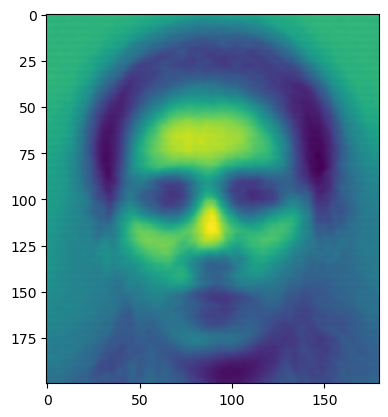

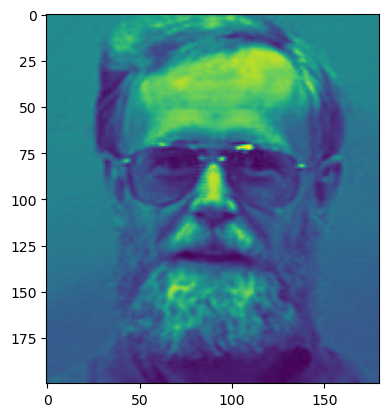

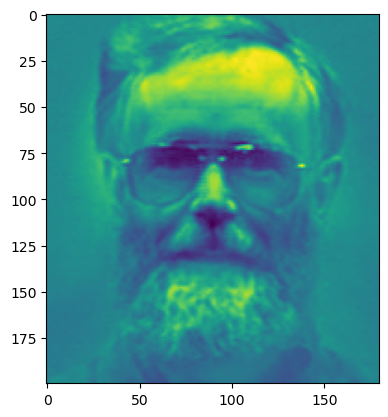

In [9]:
plt.figure()
show(FR.mu)
plt.figure()
show(FR.F[:,1])
plt.figure()
show(FR.Fbar[:,1])

## Problem 3

- In `FacialRec.__init__()`, compute the compact SVD of $\bar{F}$ and store the $U$ as an attribute.
- Use `show()` to display some of the eigenfaces (the columns of $U$).
- Implement `FacialRec.project()` (in a single line).


In [10]:
if 'FR' not in locals(): FR = FacialRec() 


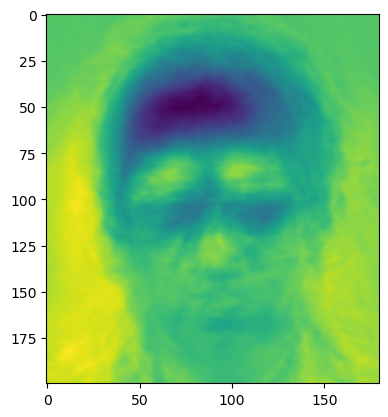

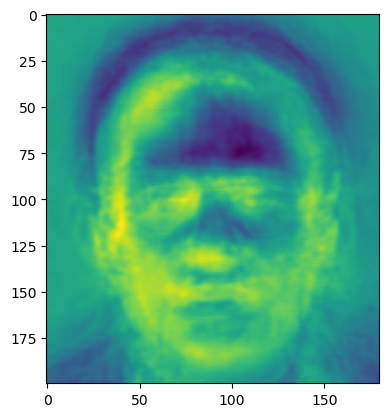

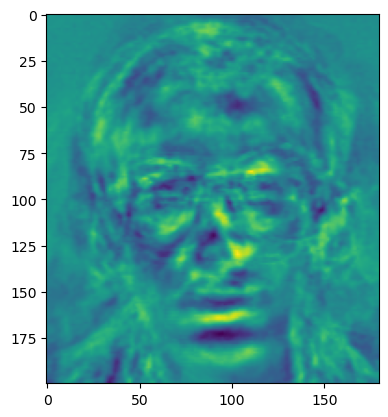

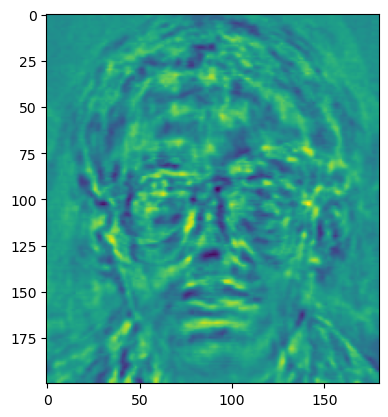

In [11]:
plt.figure()
show(FR.U[:,1])
plt.figure()
show(FR.U[:,5])
plt.figure()
show(FR.U[:,50])
plt.figure()
show(FR.U[:,100])

## Problem 4

- Select one of the shifted images $\bar{\mathbf{f}}_i$.
- For at least 4 values of $s$, use `FacialRec.project()` to compute the corresponding $s$-projection $\widehat{\mathbf{f}}_i$, then compute the reconstruction $\widetilde{\mathbf{f}}_i$.
- Display each of the reconstructions and the original image.

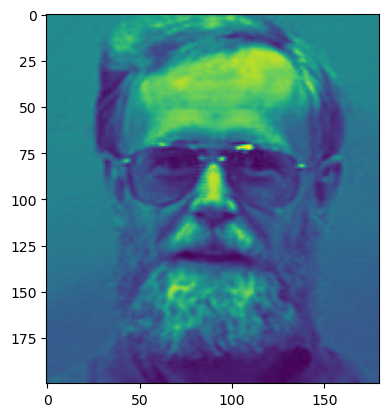

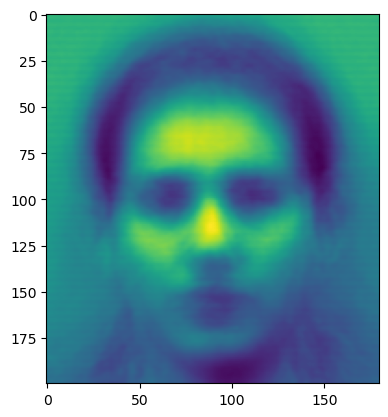

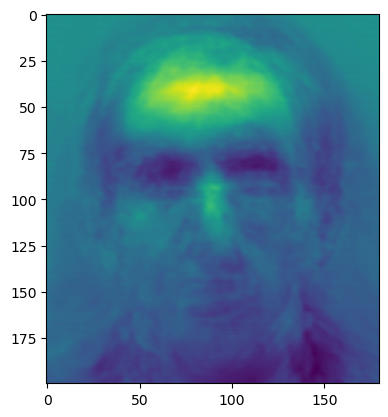

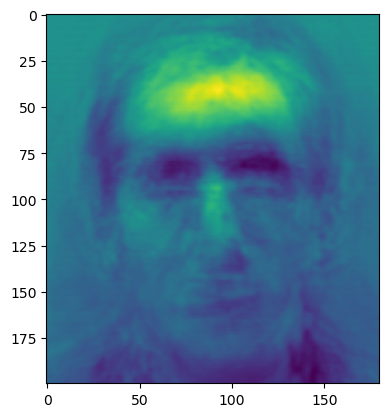

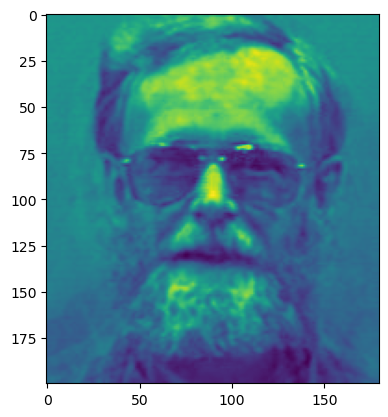

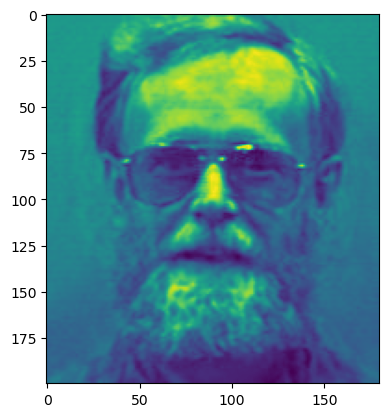

In [12]:
def reduce(face, s):
    reduction = FR.reconstitute(FR.project(face, s))
    plt.figure()
    show(reduction)
    
face = FR.Fbar[:,1]
show(FR.F[:,1])
reduce(face, 1)
reduce(face, 10)
reduce(face, 19)
reduce(face, 100)
reduce(face, 125)

## Problem 5 
Implement `FacialRec.find_nearest()`.

In [13]:
s=20

[FR.find_nearest(FR.F[:,f],s) for f in range(1,15)]
#it works well on images in the training set

[np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(10),
 np.int64(11),
 np.int64(12),
 np.int64(13),
 np.int64(14)]

## Problem 6

- Implement `FacialRec.match()`.
- Generate some random faces with `sample_faces()`, and use `FacialRec.match()` to find the closest match (let $s=38$).
- For each test, display the sample image and its closest match.

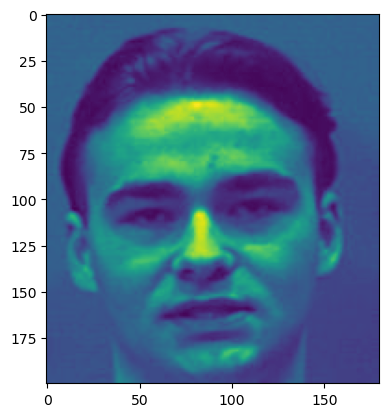

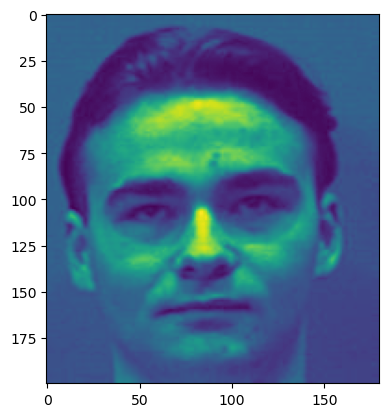

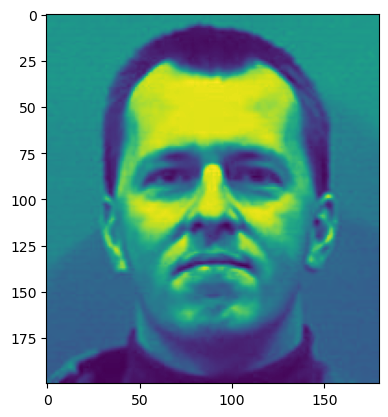

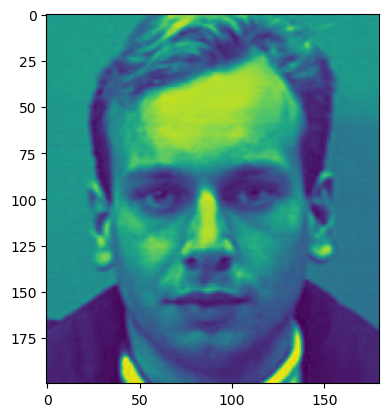

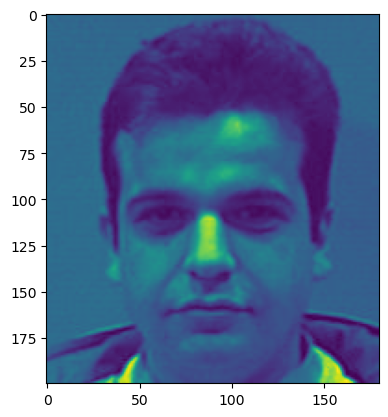

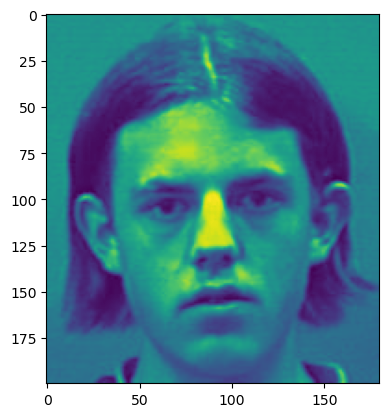

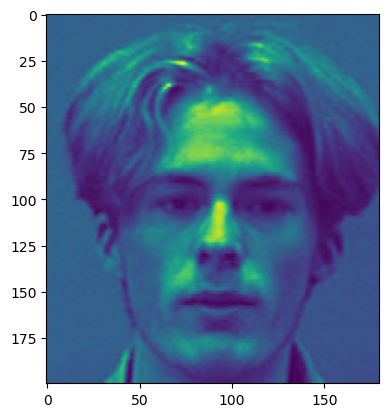

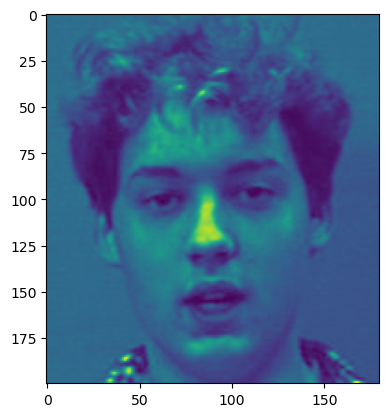

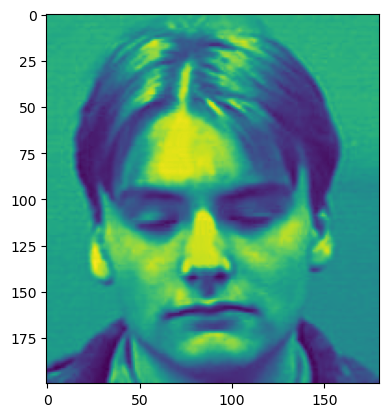

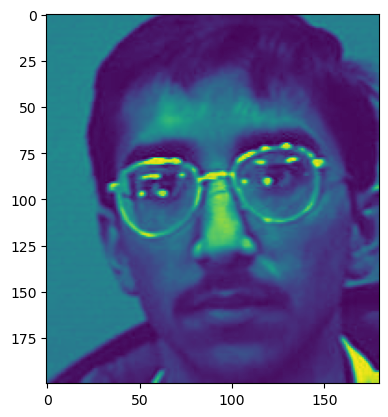

In [21]:
if 'FR' not in locals(): FR = FacialRec()

for test_image in sample_faces(5):
    FR.match(test_image, 38)

#results are not good for images that weren't in the training set, but significantly better than random